In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [9]:
df = pd.read_csv('spamsms.csv', encoding='latin-1')
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
type    5572 non-null object
text    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


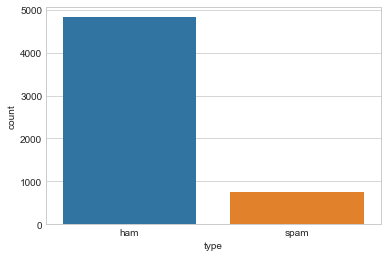

In [11]:
sns.countplot(df['type'])

In [14]:
df['type'].value_counts()

ham     4825
spam     747
Name: type, dtype: int64

In [16]:
df.describe(include='all')

,type,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
df['length'] = df['text'].apply(lambda x: len(x))
df = df[df['length'] > 0]


In [22]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
def text_processor(x):
    return x.split()

bow_transform = CountVectorizer(analyzer=text_processor).fit(df['text'])
len(bow_transform.vocabulary_)

15585

In [29]:
message_bow = bow_transform.transform(X_train)

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer
tifidif = TfidfTransformer().fit(message_bow)
messages_tifidif = tifidif.transform(message_bow)
messages_tifidif.shape

(3900, 15585)

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
spam_detector = MultinomialNB()

In [39]:
spam_detector.fit(messages_tifidif, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [40]:
y_pred = spam_detector.predict(messages_tifidif)

In [41]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [46]:
from sklearn import metrics